<a href="https://colab.research.google.com/github/venu72561-chinnam/AI-ML-project/blob/main/Word_Embedding_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "numpy<2.0" gensim spacy gradio -q

In [2]:
!python -m spacy download en_core_web_sm -q

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
from gensim.models import Word2Vec

In [4]:
import spacy

In [5]:
import matplotlib.pyplot as plt
import gradio as gr

In [6]:
from sklearn.decomposition import PCA

In [7]:
sentences = [
    ["king", "queen", "man", "woman"],
    ["apple", "banana", "mango", "fruit"],
    ["paris", "france", "tokyo", "japan"],
    ["car", "bus", "train", "transport"],
]

In [8]:
model=Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=1)

In [9]:
nlp = spacy.load("en_core_web_sm")

In [10]:
def word_vector(word):
    try:
        return model.wv[word].tolist()
    except KeyError:
        return f"'{word}' not in vocabulary!"

def most_similar(word):
    try:
        return model.wv.most_similar(word, topn=5)
    except KeyError:
        return f"'{word}' not in vocabulary!"

def analogy(word1, word2, word3):
    try:
        result = model.wv.most_similar(positive=[word1, word3], negative=[word2], topn=1)
        return f"{word1} - {word2} + {word3} ≈ {result[0][0]}"
    except KeyError as e:
        return f"Error: {str(e)}"

def similarity(word1, word2):
    try:
        return f"Similarity({word1}, {word2}) = {nlp(word1).similarity(nlp(word2)):.3f}"
    except:
        return "Error calculating similarity."

def visualize():
    words = ["king", "queen", "man", "woman", "apple", "banana", "car", "bus"]
    word_vectors = [model.wv[w] for w in words]
    pca = PCA(n_components=2)
    result = pca.fit_transform(word_vectors)

    plt.figure(figsize=(6,5))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.title("Word Embedding Visualization")
    plt.savefig("embedding.png")
    return "embedding.png"

In [11]:
# Get vector for a word
print("Vector for 'king':\n", model.wv['king'])

# Find similar words
print("\nMost similar to 'king':\n", model.wv.most_similar('king'))

Vector for 'king':
 [-0.0173568  -0.00289396  0.01895893 -0.01509898 -0.0107162   0.01863313
 -0.01794745  0.00765182  0.00133088  0.0133214   0.01662551 -0.00570157
 -0.00798463  0.01779583  0.00417929  0.01249788 -0.01889143  0.01918025
 -0.00269662 -0.01210423  0.00598507 -0.00091322  0.00941299 -0.00456604
 -0.00827568  0.0045558   0.01670877 -0.00999121  0.00533736 -0.01598111
 -0.01354669 -0.00093534 -0.01753546  0.00557888  0.00319719 -0.00463938
  0.01000758  0.01949757  0.01690854 -0.00376045  0.0041163  -0.00800738
 -0.01648281  0.01255591 -0.00389836 -0.00133241 -0.00354266 -0.00907133
  0.00812342 -0.00854036]

Most similar to 'king':
 [('fruit', 0.17922037839889526), ('bus', 0.14386184513568878), ('banana', 0.09462708234786987), ('japan', 0.04007362946867943), ('tokyo', 0.023233918473124504), ('paris', 0.008223663084208965), ('transport', -0.015218674205243587), ('mango', -0.02837306447327137), ('train', -0.03443577140569687), ('apple', -0.03925943747162819)]


In [12]:
# Analogy: king - man + woman = ?
result = model.wv.most_similar(positive=['king','woman'], negative=['man'], topn=1)
print("\nAnalogy (king - man + woman):", result)


Analogy (king - man + woman): [('fruit', 0.14145417511463165)]


In [13]:
word1 = nlp("king")
word2 = nlp("queen")
word3 = nlp("man")

# Cosine similarity
print("Similarity king vs queen:", word1.similarity(word2))
print("Similarity king vs man:", word1.similarity(word3))

Similarity king vs queen: 0.42202005567919104
Similarity king vs man: 0.7392017865690795


/tmp/ipython-input-1336200926.py:6: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print("Similarity king vs queen:", word1.similarity(word2))
/tmp/ipython-input-1336200926.py:7: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or

In [14]:
words = ["king", "queen", "man", "woman", "apple", "banana", "car", "bus"]
word_vectors = [model.wv[w] for w in words]

In [15]:
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

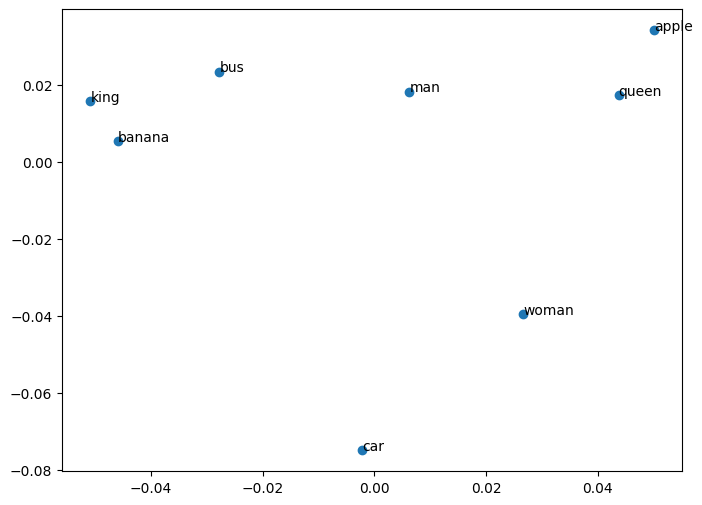

In [16]:
# Plot
plt.figure(figsize=(8,6))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [17]:
with gr.Blocks() as demo:
    gr.Markdown("## 🧠 Word Embedding Playground")

    with gr.Tab("Word Vector"):
        word_in = gr.Textbox(label="Enter a word")
        word_out = gr.JSON(label="Vector")
        word_in.submit(word_vector, word_in, word_out)

    with gr.Tab("Most Similar"):
        sim_in = gr.Textbox(label="Enter a word")
        sim_out = gr.JSON(label="Top 5 similar words")
        sim_in.submit(most_similar, sim_in, sim_out)

    with gr.Tab("Analogy"):
        w1 = gr.Textbox(label="Word 1")
        w2 = gr.Textbox(label="Word 2 (to subtract)")
        w3 = gr.Textbox(label="Word 3")
        ana_out = gr.Textbox(label="Result")
        btn1 = gr.Button("Compute Analogy")
        btn1.click(analogy, [w1, w2, w3], ana_out)

    with gr.Tab("Similarity"):
        s1 = gr.Textbox(label="Word 1")
        s2 = gr.Textbox(label="Word 2")
        simscore = gr.Textbox(label="Similarity Score")
        btn2 = gr.Button("Check Similarity")
        btn2.click(similarity, [s1, s2], simscore)

    with gr.Tab("Visualization"):
        viz_btn = gr.Button("Show Embedding Plot")
        viz_img = gr.Image(label="2D PCA Projection")
        viz_btn.click(visualize, None, viz_img)

In [18]:
demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cfac9f9e76da82ac01.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
